In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

%matplotlib inline

### Load dataset

In [2]:
df_customers_segmented = pd.read_csv('data/customers_segmented.csv', header=0, index_col='CustomerID')
df_customers_segmented.head()

,Age,Education,Income,Occupation,Gender,Marital Status,Settlement Size,Segment
CustomerID,,,,,,,,
1,67,2,124670,1,1,0,2,0
2,22,1,150773,1,0,1,2,2
3,49,1,89210,0,1,0,0,1
4,45,1,171565,1,1,0,1,3
5,53,1,149031,1,1,0,1,3


### Inspect

In [3]:
print('The dimention of the dataset')
print(df_customers_segmented.shape)

print('\nDetail description of the dataset')
print(df_customers_segmented.info())

The dimention of the dataset
(2000, 8)

Detail description of the dataset
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              2000 non-null   int64
 1   Education        2000 non-null   int64
 2   Income           2000 non-null   int64
 3   Occupation       2000 non-null   int64
 4   Gender           2000 non-null   int64
 5   Marital Status   2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
 7   Segment          2000 non-null   int64
dtypes: int64(8)
memory usage: 140.6 KB
None


# Analysis

In [4]:
df_customers_analysis = df_customers_segmented.groupby('Segment').mean().round(2)
df_customers_analysis.head()

,Age,Education,Income,Occupation,Gender,Marital Status,Settlement Size
Segment,,,,,,,
0,55.70,2.13,158338.42,1.13,0.50,0.69,1.11
1,35.58,0.75,97859.85,0.33,0.65,0.02,0.04
2,28.96,1.07,105759.12,0.63,0.15,1.00,0.42
3,35.64,0.73,141218.25,1.27,0.97,0.17,1.52


### Assign segment names

In [5]:
segment_names = {
    0: 'Wealthy',
    1: 'Fewer opportunities',
    2: 'Uprising',
    3: 'Career oriented'
}
df_customers_segmented['Segment'] = df_customers_segmented['Segment'].map(segment_names)
df_customers_segmented.head()

,Age,Education,Income,Occupation,Gender,Marital Status,Settlement Size,Segment
CustomerID,,,,,,,,
1,67,2,124670,1,1,0,2,Wealthy
2,22,1,150773,1,0,1,2,Uprising
3,49,1,89210,0,1,0,0,Fewer opportunities
4,45,1,171565,1,1,0,1,Career oriented
5,53,1,149031,1,1,0,1,Career oriented


### Age vs Income of each segment

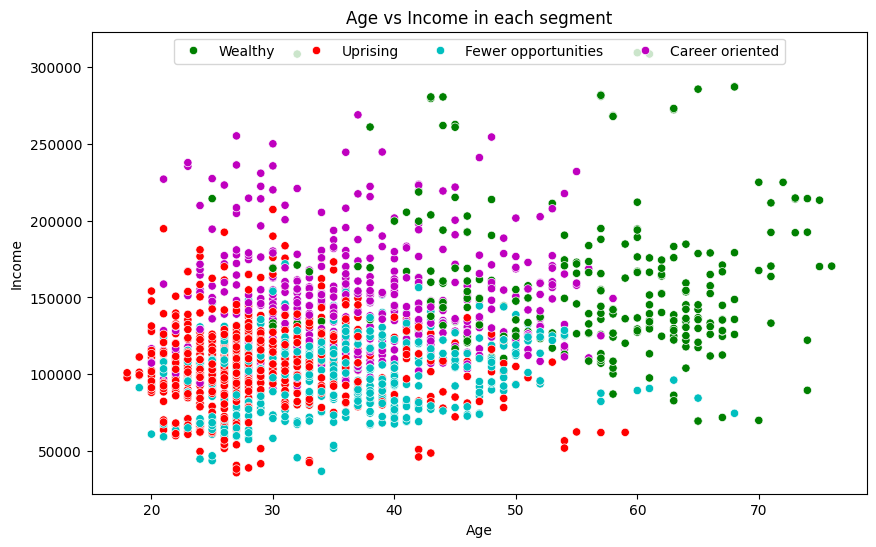

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_customers_segmented,
    x='Age',
    y='Income',
    hue='Segment',
    palette=['g', 'r', 'c', 'm']
)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4)
plt.title('Age vs Income in each segment')
plt.show()

## Income levels in different segment

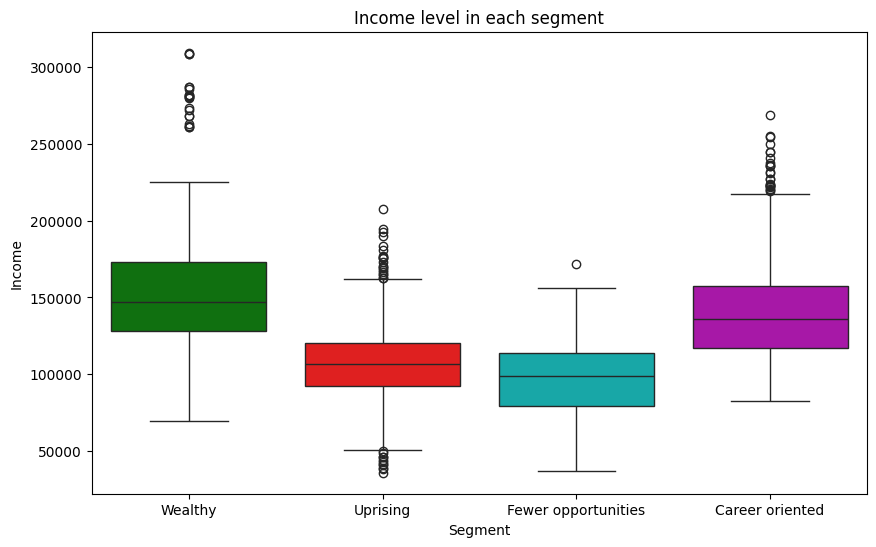

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_customers_segmented,
    x='Segment',
    y='Income',
    hue='Segment',
    palette=['g', 'r', 'c', 'm'],
    legend=False
)
plt.title('Income level in each segment')
plt.show()

### Income level of each segment gets divided based on education 

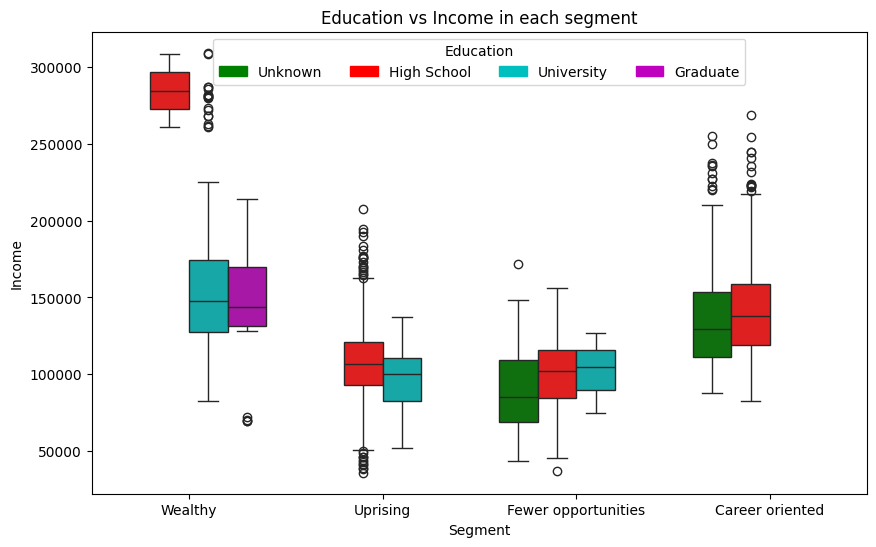

In [8]:
plt.figure(figsize=(10, 6))
s = sns.boxplot(
    data=df_customers_segmented,
    x='Segment',
    y='Income',
    hue='Education',
    palette=['g', 'r', 'c', 'm']
)
g = mpatches.Patch(color='g', label='Unknown')
r = mpatches.Patch(color='r', label='High School')
c = mpatches.Patch(color='c', label='University')
m = mpatches.Patch(color='m', label='Graduate')
plt.legend(handles=[g, r, c, m], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, title='Education')
plt.title('Education vs Income in each segment')
plt.show()

### Income of each segment further divided per settlement-size

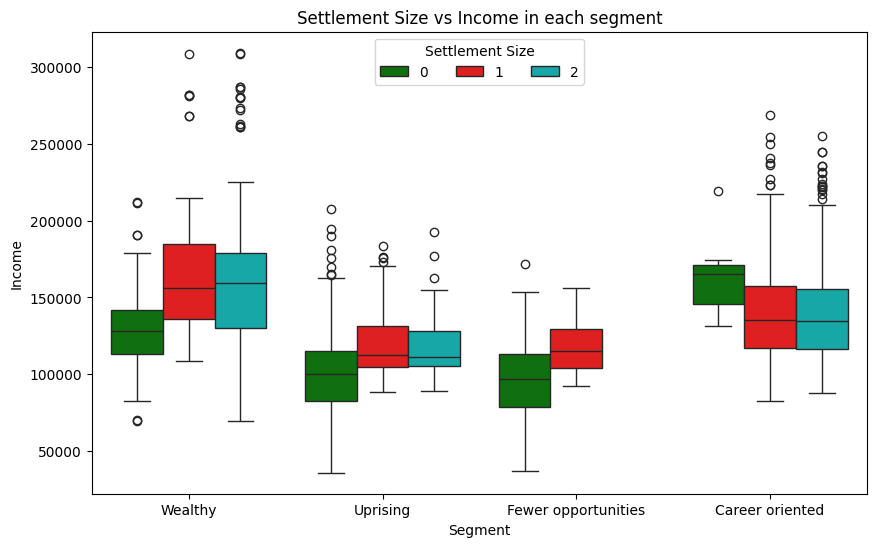

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_customers_segmented,
    x='Segment',
    y='Income',
    hue='Settlement Size',
    palette=['g', 'r', 'c']
)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, title='Settlement Size')
plt.title('Settlement Size vs Income in each segment')
plt.show()

### Population per segment

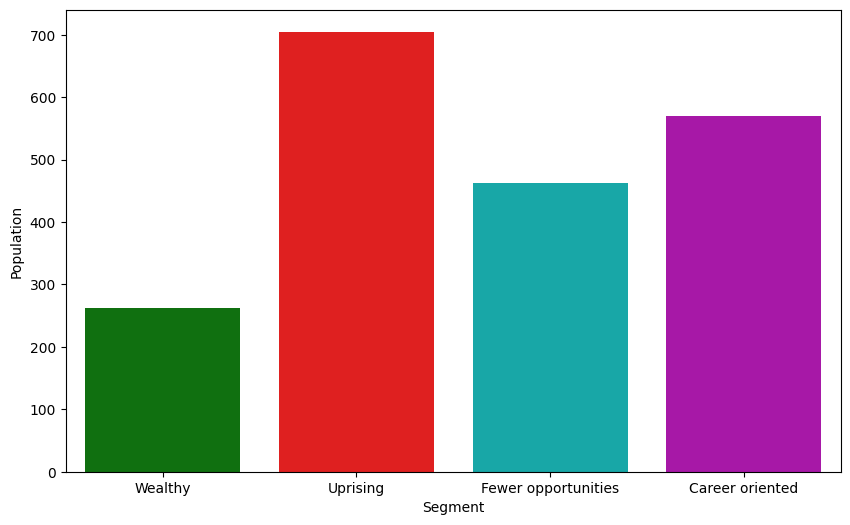

In [10]:
plt.figure(figsize=(10, 6))
s = sns.countplot(
    data=df_customers_segmented,
    x='Segment',
    hue='Segment',
    palette=['g', 'r', 'c', 'm'],
    legend=False
)
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()